In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

Your Name and PRN:
- Name: Harsh Naik
- PRN : 8013


# Deep Neural Networks

## Assignment: A03
### Neural Network with :
- One hidden layer 
- ${Tanh}$ activation function
- Compare with Tensorflow implementation


### Assignment
- **Q1**: Is this model more accurate compared to previous model?
- **Q2**: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.

|#|Dimension of hidden layer|Learning rate|Training Accuracy|Test Accuracy|Comment|
|:-:|:-:|:-:|:-:|:-:|:--|
|1|4|0.1|0.97|0.96|Base case||1|4|0.1|0.97|0.96|Base case|
|2|1|1|???|???|???|
|...|...|...|...|...|...|
|n|...|...|...|...|...|

- **Q3**: What lines will you change to convert it into multi-class prediction model?
- **Q4**: How many epochs are sufficient?

In [2]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections.abc import Callable
from typing import Literal

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

%matplotlib inline

In [3]:
###----------------
### Some parameters
###----------------

inpDir = '../input'
outDir = '../output'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 20001 # number of epochs
ALPHA = 0.1 # learning rate
NUM_SAMPLES = 1280 # How many samples we want to generate 
NOISE = 0.2 # Noise to be introduced in the data
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'coolwarm' # plt.cm.Spectral

plt.rcParams.update(params)

### Helper Functions

In [4]:
###-------------------------
### Function to plot history
###-------------------------

#### Note this function is specifically designed to plot Tensorflow training output

def fn_plot_hist(hist_df : pd.DataFrame):
    
    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: loss
            column 1: accuracy
            column 2: val_loss
            column 3: val_accuracy
            While plotting columns are accessed by index 
            so that even if the column names are different it will not throw exceptions.
    '''
    
    # create figure and axis array
    fig, axes = plt.subplots(1,2 , figsize = (15,6)) 

    
    # properties  matplotlib.patch.Patch 
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)

    
    # take first axis
    ax = axes[0]
    
    
    # Plot Column 0 and 2 (Loss and validation loss)
    hist_df.plot(y = [hist_df.columns[0],hist_df.columns[2]], 
                 ax = ax,
                 colormap=CMAP) 

    # get minimum values for plotting
    lossmin = hist_df[hist_df.columns[0]].min()
    
    testmin = hist_df[hist_df.columns[2]].min()

    
    # little beautification
    txtstr = "Min {}: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(hist_df.columns[0],
                                                                          lossmin,
                                                                          testmin) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.4, 0.95, txtstr,
            transform=ax.transAxes,
            fontsize=14,
            verticalalignment='top',
            bbox=props)

    # x axis label
    ax.set_xlabel("Epochs")

    # y axis lable
    ax.set_ylabel(hist_df.columns[0].capitalize())
    
    # Show grids on the axis
    ax.grid()
    
    
    # take second axis object
    ax = axes[1]

    # plot column 1 and 3 (accuracy and validation accuracy)
    hist_df.plot( y = [hist_df.columns[1], hist_df.columns[3]],
                 ax = ax, 
                 colormap=CMAP)

    
    # little beautification
    accmin = hist_df[hist_df.columns[1]].max()
    
    testmin = hist_df[hist_df.columns[3]].max()
    
    txtstr = "Max {}: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(hist_df.columns[1],
                                                                          accmin,
                                                                          testmin) #text to plot
    
    # place a text box in upper left in axes coords
    ax.text(0.4, 0.5, txtstr, 
            transform=ax.transAxes,
            fontsize=14,
            verticalalignment='top',
            bbox=props)

    ax.set_xlabel("Epochs")
    ax.set_ylabel(hist_df.columns[1].capitalize())
    ax.grid();
    plt.tight_layout()

In [5]:
###-----------------------------------
### Function to plot Decision boundary
###-----------------------------------

def fn_plot_decision_boundary(pred_func: Callable[[], np.float64], X: np.ndarray, y: np.ndarray):
    '''
        Attrib:
           pred_func : function based on predict method of the classifier
           X : feature matrix
           y : targets
       Return:
           None
    '''
    
    # Set min and max values and give it some padding
    xMin, xMax = X[:, 0].min() - .05, X[:, 0].max() + .05
    yMin, yMax = X[:, 1].min() - .05, X[:, 1].max() + .05
    
    # grid size for mesh grid
    h = 0.01
    
    # Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    
    # Make its shape same as that of xx 
    Z = Z.reshape(xx.shape)
    
    # Now we have Z value corresponding to each of the combination of xx and yy
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=CMAP) #, alpha = 0.8
    
    # plot the points as well
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=CMAP, edgecolors='black')

## Generate Data Set
<p style="font-family: Arial; font-size:1.1em;color:blue;">
Use Sklearn's dataset generator <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a>.
</p>

In [6]:
X, y = datasets.make_moons(n_samples=NUM_SAMPLES, shuffle=True, noise=NOISE, random_state=RANDOM_STATE)

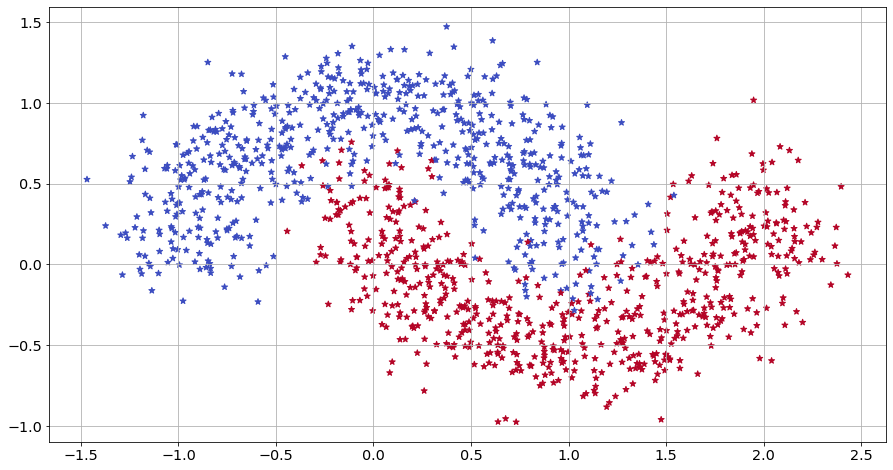

In [7]:
# Lets Plot the data
plt.scatter(X[:,0], X[:,1], s=40, c=y, marker='*', cmap=CMAP)

plt.grid()

In [8]:
#  Split the data in training and test sets to measure performance of the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE )

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1024, 2) (1024,) (256, 2) (256,)


# if you really want to save on space, convert to float32

X_train = X_train.astype(np.float32)

X_test = X_test.astype(np.float32)

y_train = y_train.astype(np.float32)

y_test = y_test.astype(np.float32)

## Neural Network

Let's start with simple network. Our data has **two** features. Hence size of input layer will also be two. The output is binary, we can code it as single column as well as double column output. The hidden layer could be of **any size**. One need to execute a handful of iterations to arrive at right size of hidden layer. For purpose of today's discussions, size of hidden layer is taken as shown below.
<img src='../../images/dnn_nb_s04_fig1.png' width = '500'/>

## Activation Functions

### Sigmoid Function

In [9]:
# sigmoid function is applied to each Value independently
def fn_sigmoid(z : np.ndarray)-> np.ndarray:
    '''
    Args:
        z : a matrix of z values of shape (m, n_output)
    returns:
        sigmoid values of z
    
    '''
    
    return 1 / ( 1 + np.exp ( -z ) )
    

In [10]:
sm = fn_sigmoid(np.asarray([[-1, 0., 1.], [-np.inf, 0., np.inf]]))
print (sm)

[[0.26894142 0.5        0.73105858]
 [0.         0.5        1.        ]]


### Tanh Activation Function

In [11]:
def fn_tanh(z: np.ndarray) -> np.ndarray:
    
    '''
        Args:
           z : array, Aggregated values 
       Return:
           Activations for each z
    '''

    return np.tanh(z)

def fn_tanh_prime(a: np.ndarray) -> np.ndarray:
    '''
        Args:
           a : array, Aggregated values 
       Return:
           Derivative, for each a
    '''

    return 1.0 - np.tanh(a)**2

In [12]:
th = fn_tanh(np.asarray([[-1, 0., 1.], [-np.inf, 0., np.inf]]))
print (th)

[[-0.76159416  0.          0.76159416]
 [-1.          0.          1.        ]]


## Predict Function

For predictions, we will simply be using the forward propagation. No need to iterate or calculate the back propagation for supervised learning.


In [13]:
# Helper function to predict an output (0 or 1)

def predict(model : dict, X: np.ndarray) -> Literal:
    '''
     Args:
         model
         X: input features
    Returns:
        Predictions against the instances
         
    '''
    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    
    #### Forward Propogation   
    # Layer 1
    z1 = X.dot(W1) + b1 # Agg
    a1 = fn_tanh (z1) # Activation

    # Layer 2
    z2 = a1.dot(W2) + b2
    a2 = fn_sigmoid(z2)
    
    return a2>=0.5 # Is it greater than 0.5?

## Loss Function

In [14]:
# function to evaluate the total loss on the dataset

def calculate_loss(model : dict, X: np.ndarray, y: np.ndarray) -> np.float64:
    '''
    Args:
        model: dictionay object containing weights and biases
        X: Feature Matrix
        y: Labels array
    Returns:
        Average loss
    '''
    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    
    #### Forward Propogation   
    # Layer 1
    z1 = X.dot(W1) + b1 # Agg
    a1 = fn_tanh (z1) # Activation

    # Layer 2
    z2 = a1.dot(W2) + b2
    a2 = fn_sigmoid(z2)
    
    data_loss = -(y* np.log(a2)).sum()

    return 1./num_examples * data_loss

## Model

In [15]:
# prepare the Model

def build_model(nn_hdim : np.int64, 
                X : np.ndarray, 
                y : np.ndarray, 
                epochs: np.int64 = EPOCHS, 
                alpha: np.float64 = ALPHA) -> dict:
    
    '''
    Args:
        nn_hdim : Number of nodes in the hidden layer
        X : np.ndarray; Training features to train
        y : np.ndarray; Trainig targets (labels)
        epochs : Number of passes through the training data for gradient descent
        alpha : learning rate
        
    Returns:
        Model: Dictionary object containing weights and biases
    '''
    
    # Initialize the parameters to random values. We need to learn these.
    # Weights
    
    '''
    ##### 
            Change from Rand to Randn gives different shape fo the loss curve
            Demonstrate in the class
    #####
    '''
    
    W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    W2 = np.random.rand(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    
    b1 = np.zeros ((1, nn_hdim))
    b2 = np.zeros ((1, nn_output_dim))
    
    curr_loss = 0
    
    loss = []
    epoch = []
    
    for i in range (0, epochs):
        
        #### Forward Propogation
        
        # Layer 1
        z1 = X.dot(W1) + b1 # Agg
        a1 = fn_tanh (z1) # Activation
        
        # Layer 2
        z2 = a1.dot(W2) + b2
        a2 = fn_sigmoid(z2)
        
        ### Back Propogation
        
        dz2 = a2 - y
        
        dW2 = (a1.T).dot(dz2)
        assert (W2.shape == dW2.shape), 'Shape of W2 {} and shape of dW2 {}'.format(W2.shape, dW2.shape)
        db2 = np.sum(dz2, axis = 0, keepdims=True)
        
        dz1 = dz2.dot(W2.T) * fn_tanh_prime(z1)
        
        dW1 = (X.T).dot(dz1)
        assert (W1.shape == dW1.shape), 'Shape of W1 {} and shape of dW1 {}'.format(W1.shape, dW1.shape)
        db1 = np.sum(dz1, axis = 0, keepdims=True)
        
        ########################
        ### Gradient Updates ###
        ########################
        # gradients are being updated for every epoch
        W1 += -alpha *dW1 / num_examples
        W2 += -alpha *dW2 / num_examples
        b1 += -alpha *db1 / num_examples
        b2 += -alpha *db2 / num_examples
        
        # Store model in a dict object
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # for every nth epoch calculate loss for future plotting
        if i%100 ==  0:
            curr_loss = calculate_loss (model, X, y)
            loss.append(curr_loss)
            epoch.append(i)
            
        # print loss every nth epoch    
        if i%1000 == 0:
            print ('loss after {} epochs : {}'.format(i,curr_loss))
    
    # update loss_hist
    loss_hist['epoch'] =epoch
    loss_hist['loss'] = loss
    
    
    return model

In [16]:
num_examples, nn_input_dim = X_train.shape # training set size (rows and cols)
nn_output_dim = 1 # output layer dimensionality

# lists to facilitate plotting 
loss_hist = {}

In [17]:
num_examples, nn_input_dim

(1024, 2)

**Note:** - The vector y_train is being converted to 2-dimensional array

In [18]:
y_train = y_train.reshape(-1,1)
y_train.shape

(1024, 1)

In [19]:
# Build a model with a 4-dimensional hidden layer
model = build_model(4, X_train, y_train,
                    epochs = EPOCHS, 
                    alpha = ALPHA)

loss after 0 epochs : 0.2975464893959424
loss after 1000 epochs : 0.14832772950569495
loss after 2000 epochs : 0.10529788127102664
loss after 3000 epochs : 0.0720469972937948
loss after 4000 epochs : 0.051189206433937214
loss after 5000 epochs : 0.04344262508762446
loss after 6000 epochs : 0.04070659373145353
loss after 7000 epochs : 0.03959935026412129
loss after 8000 epochs : 0.03909206778211762
loss after 9000 epochs : 0.038835577986436484
loss after 10000 epochs : 0.03869348159184014
loss after 11000 epochs : 0.03860581530334985
loss after 12000 epochs : 0.038543401938731896
loss after 13000 epochs : 0.03849049884233495
loss after 14000 epochs : 0.038437638557465494
loss after 15000 epochs : 0.03837894118033118
loss after 16000 epochs : 0.038311779378051275
loss after 17000 epochs : 0.038237074357530876
loss after 18000 epochs : 0.038158417443141635
loss after 19000 epochs : 0.038079885382219056
loss after 20000 epochs : 0.03800428336607115


In [20]:
model

{'W1': array([[ 2.79041323,  2.44973647,  3.47216863,  2.91766123],
        [-1.55566561, -0.64631344,  2.15366291, -1.44832851]]),
 'b1': array([[-3.48402778,  1.50405902, -2.11977868,  1.25236474]]),
 'W2': array([[ 6.79080742],
        [ 3.17545374],
        [-6.6946741 ],
        [ 4.44762643]]),
 'b2': array([[-0.61155654]])}

Would contest that we should have used higher epochs as loss is still coming down. 

## Make predictions

In [21]:
y_pred = predict(model, X_train)
print('Accuracy score on Train Data :', accuracy_score(y_train, y_pred))

Accuracy score on Train Data : 0.96875


In [22]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       522
           1       0.97      0.97      0.97       502

    accuracy                           0.97      1024
   macro avg       0.97      0.97      0.97      1024
weighted avg       0.97      0.97      0.97      1024



In [23]:
y_pred = predict(model, X_test)

print('Accuracy score on Test Data :', accuracy_score(y_test, y_pred))

Accuracy score on Test Data : 0.95703125


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       118
           1       0.96      0.96      0.96       138

    accuracy                           0.96       256
   macro avg       0.96      0.96      0.96       256
weighted avg       0.96      0.96      0.96       256



## Plot loss and decision boundary

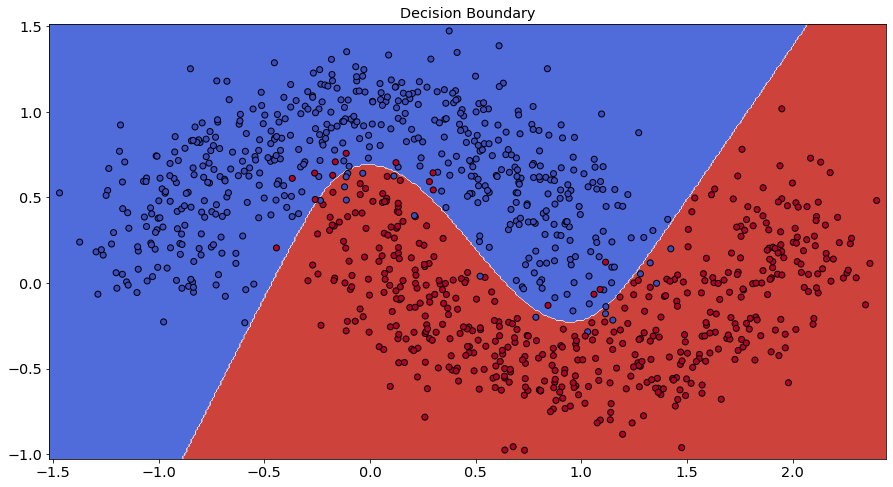

In [25]:
loss_df = pd.DataFrame(loss_hist)

fn_plot_decision_boundary(lambda x: predict(model, x), X_train, y_train) # plot decision boundary for this plot

plt.title("Decision Boundary");

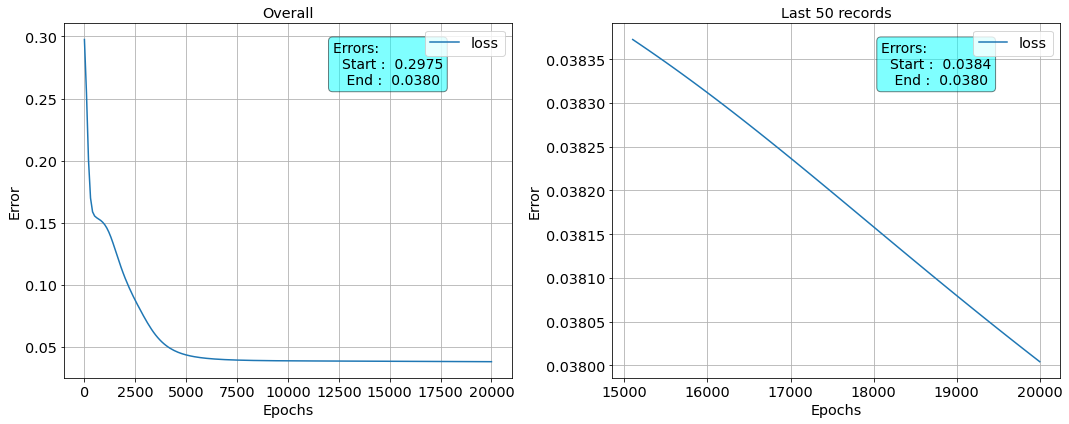

In [26]:
fig, axes = plt.subplots(1,2 , figsize = (15,6))

l_range = 50

ax = axes[0]

loss_df.plot(x = 'epoch', y = 'loss', ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0]['loss'],
                                                                loss_df.iloc[-1]['loss']) #text to plot

# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='aqua', alpha=0.5)

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Overall')
ax.grid();

ax = axes[1]

loss_df[-l_range:].plot(x = 'epoch', y = 'loss', ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[-l_range]['loss'],
                                                                loss_df.iloc[-1]['loss']) #text to plot

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Last {} records'.format(l_range))
ax.grid();
plt.tight_layout()

In [27]:
cm  = confusion_matrix(y_test, y_pred)
cm

array([[113,   5],
       [  6, 132]], dtype=int64)

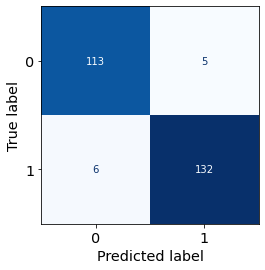

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Blues', colorbar=False)

plt.show();

### Chaging alpha to 0.001

loss after 0 epochs : 0.2706926115154115
loss after 1000 epochs : 0.2838905832460552
loss after 2000 epochs : 0.29021145055128844
loss after 3000 epochs : 0.2912830980448719
loss after 4000 epochs : 0.2885209003570462
loss after 5000 epochs : 0.2831592899667321
loss after 6000 epochs : 0.27623105417286165
loss after 7000 epochs : 0.26853843467902605
loss after 8000 epochs : 0.26064243068846626
loss after 9000 epochs : 0.2528845568467668
loss after 10000 epochs : 0.24543720607056962
loss after 11000 epochs : 0.23836453439527122
loss after 12000 epochs : 0.2316749645306887
loss after 13000 epochs : 0.22535590439467526
loss after 14000 epochs : 0.21939141599393316
loss after 15000 epochs : 0.21376850982839052
loss after 16000 epochs : 0.20847781370998805
loss after 17000 epochs : 0.20351236252424199
loss after 18000 epochs : 0.1988662665291325
loss after 19000 epochs : 0.19453377841443842
loss after 20000 epochs : 0.19050873513496452
Accuracy score on Train Data : 0.8388671875
           

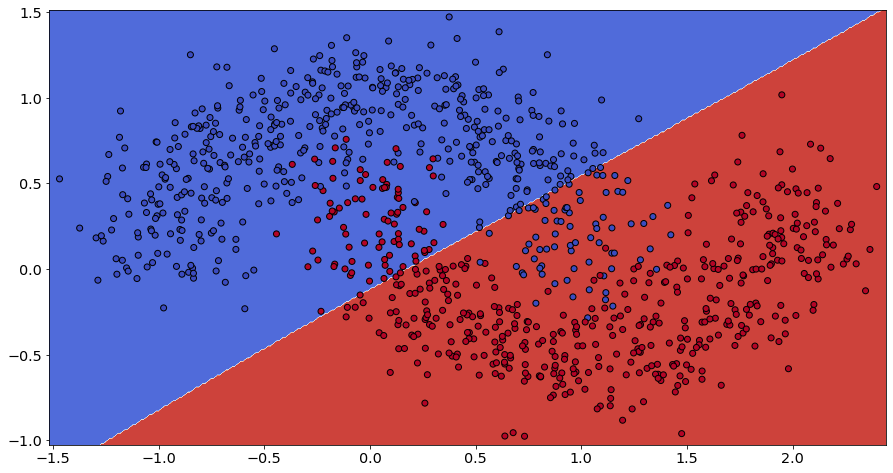

In [29]:
model = build_model(4, X_train, y_train,
                    epochs = EPOCHS, 
                    alpha = 0.001)

## Make predictions

y_pred = predict(model, X_train)
print('Accuracy score on Train Data :', accuracy_score(y_train, y_pred))

print(classification_report(y_train, y_pred))

y_pred = predict(model, X_test)

print('Accuracy score on Test Data :', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

## Plot loss and decision boundary

loss_df = pd.DataFrame(loss_hist)

fn_plot_decision_boundary(lambda x: predict(model, x), X_train, y_train) # plot decision boundary for this plot


### changing alpha to 0.01

loss after 0 epochs : 0.2294970815974605
loss after 1000 epochs : 0.23692619766123996
loss after 2000 epochs : 0.1919543562082885
loss after 3000 epochs : 0.16579204039922563
loss after 4000 epochs : 0.15674666883703844
loss after 5000 epochs : 0.15402944817192035
loss after 6000 epochs : 0.15291829783433847
loss after 7000 epochs : 0.1521137829038866
loss after 8000 epochs : 0.1512060084272786
loss after 9000 epochs : 0.149968995219455
loss after 10000 epochs : 0.14820436444828017
loss after 11000 epochs : 0.14573561007795868
loss after 12000 epochs : 0.14246259382460763
loss after 13000 epochs : 0.1384203521319444
loss after 14000 epochs : 0.1337848698757071
loss after 15000 epochs : 0.12881331809234886
loss after 16000 epochs : 0.1237613661306394
loss after 17000 epochs : 0.11882658914196971
loss after 18000 epochs : 0.11413317400075738
loss after 19000 epochs : 0.1097437196577265
loss after 20000 epochs : 0.10567899051483137
Accuracy score on Train Data : 0.9130859375
             

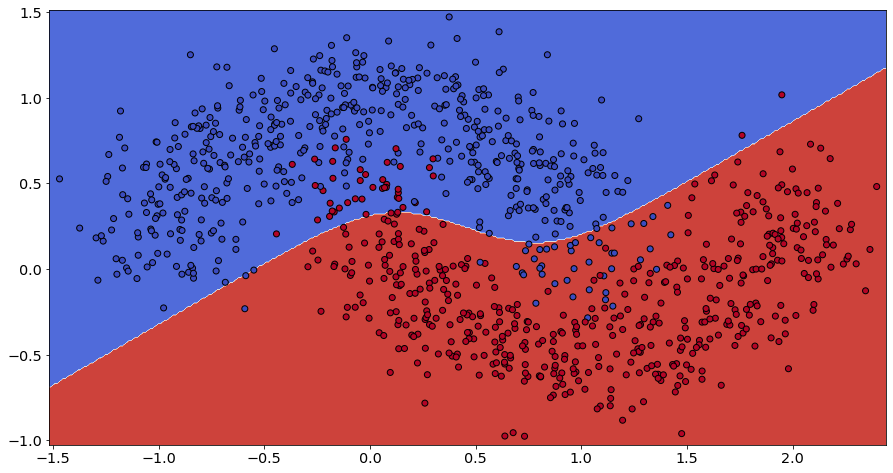

In [30]:
model = build_model(4, X_train, y_train,
                    epochs = EPOCHS, 
                    alpha = 0.01)

## Make predictions

y_pred = predict(model, X_train)
print('Accuracy score on Train Data :', accuracy_score(y_train, y_pred))

print(classification_report(y_train, y_pred))

y_pred = predict(model, X_test)

print('Accuracy score on Test Data :', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

## Plot loss and decision boundary

loss_df = pd.DataFrame(loss_hist)

fn_plot_decision_boundary(lambda x: predict(model, x), X_train, y_train) # plot decision boundary for this plot


## Trying by changing the model to multiclass 

In [49]:
y_train = y_train.reshape(1024)

In [58]:
y_train = y_train.astype(np.float32)

y_test = y_test.astype(np.float32)

In [53]:
y_train =pd.get_dummies(y_train)

y_test =pd.get_dummies(y_test)
y_test

C:\Users\NAIK\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,0,1
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
251,0,1
252,1,0
253,0,1
254,1,0


In [62]:
y_test.shape

(256, 2)

In [66]:

def predict(model : dict, X: np.ndarray) -> Literal:
    '''
     Args:
         model
         X: input features
    Returns:
        Predictions against the instances
         
    '''
    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    
    #### Forward Propogation   
    # Layer 1
    z1 = X.dot(W1) + b1 # Agg
    a1 = fn_tanh (z1) # Activation

    # Layer 2
    z2 = a1.dot(W2) + b2
    a2 = fn_sigmoid(z2)
    
    return a2>=0.5 # Is it greater than 0.5?

## Loss Function

# function to evaluate the total loss on the dataset

def calculate_loss(model : dict, X: np.ndarray, y: np.ndarray) -> np.float64:
    '''
    Args:
        model: dictionay object containing weights and biases
        X: Feature Matrix
        y: Labels array
    Returns:
        Average loss
    '''
    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    
    #### Forward Propogation   
    # Layer 1
    z1 = X.dot(W1) + b1 # Agg
    a1 = fn_tanh (z1) # Activation

    # Layer 2
    z2 = a1.dot(W2) + b2
    a2 = fn_sigmoid(z2)
    
    data_loss = -(y* np.log(a2)).sum()

    return 1./num_examples * data_loss

## Model

# prepare the Model

def build_model(nn_hdim : np.int64, 
                X : np.ndarray, 
                y : np.ndarray, 
                epochs: np.int64 = EPOCHS, 
                alpha: np.float64 = ALPHA) -> dict:
    
    '''
    Args:
        nn_hdim : Number of nodes in the hidden layer
        X : np.ndarray; Training features to train
        y : np.ndarray; Trainig targets (labels)
        epochs : Number of passes through the training data for gradient descent
        alpha : learning rate
        
    Returns:
        Model: Dictionary object containing weights and biases
    '''
    
    # Initialize the parameters to random values. We need to learn these.
    # Weights
    
    '''
    ##### 
            Change from Rand to Randn gives different shape fo the loss curve
            Demonstrate in the class
    #####
    '''
    
    W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    W2 = np.random.rand(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    
    b1 = np.zeros ((1, nn_hdim))
    b2 = np.zeros ((1, nn_output_dim))
    
    curr_loss = 0
    
    loss = []
    epoch = []
    
    for i in range (0, epochs):
        
        #### Forward Propogation
        
        # Layer 1
        z1 = X.dot(W1) + b1 # Agg
        a1 = fn_tanh (z1) # Activation
        
        # Layer 2
        z2 = a1.dot(W2) + b2
        a2 = fn_sigmoid(z2)
        
        ### Back Propogation
        
        dz2 = a2 - y
        
        dW2 = (a1.T).dot(dz2)
        assert (W2.shape == dW2.shape), 'Shape of W2 {} and shape of dW2 {}'.format(W2.shape, dW2.shape)
        db2 = np.sum(dz2, axis = 0)
        
        dz1 = dz2.dot(W2.T) * fn_tanh_prime(z1)
        
        dW1 = (X.T).dot(dz1)
        assert (W1.shape == dW1.shape), 'Shape of W1 {} and shape of dW1 {}'.format(W1.shape, dW1.shape)
        db1 = np.sum(dz1, axis = 0)
        
        ########################
        ### Gradient Updates ###
        ########################
        # gradients are being updated for every epoch
        W1 += -alpha *dW1 / num_examples
        W2 += -alpha *dW2 / num_examples
        b1 += -alpha *db1 / num_examples
        b2 += -alpha *db2 / num_examples
        
        # Store model in a dict object
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # for every nth epoch calculate loss for future plotting
        if i%100 ==  0:
            curr_loss = calculate_loss (model, X, y)
            loss.append(curr_loss)
            epoch.append(i)
            
        # print loss every nth epoch    
        if i%1000 == 0:
            print ('loss after {} epochs : {}'.format(i,curr_loss))
    
    # update loss_hist
    loss_hist['epoch'] =epoch
    loss_hist['loss'] = loss
    
    
    return model

num_examples, nn_input_dim = X_train.shape # training set size (rows and cols)
nn_output_dim = 2 # output layer dimensionality

# lists to facilitate plotting 
loss_hist = {}

num_examples, nn_input_dim

#**Note:** - The vector y_train is being converted to 2-dimensional array

#y_train = y_train.reshape(-1,1)
#y_train.shape

# Build a model with a 4-dimensional hidden layer
model = build_model(4, X_train, y_train,
                    epochs = EPOCHS, 
                    alpha = ALPHA)

#Would contest that we should have used higher epochs as loss is still coming down. 

## Make predictions

y_pred = predict(model, X_train)
print('Accuracy score on Train Data :', accuracy_score(y_train, y_pred))

print(classification_report(y_train, y_pred))

y_pred = predict(model, X_test)

print('Accuracy score on Test Data :', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

## Plot loss and decision boundary

loss_df = pd.DataFrame(loss_hist)

fn_plot_decision_boundary(lambda x: predict(model, x), X_train, y_train) # plot decision boundary for this plot


ValueError: Length of values (1) does not match length of index (4)

In [ ]:
m = {"Dimension of hidden layer":[4,4,4],"Learning rate":[0.1,0.001,0.01],"Training Accuracy":[ 0.96875,0.8779296875,0.8740234375],"Test Accuracy":[ 0.95703125,0.87890625,0.87890625],"Comment":["","Single Class","Single Class",""]}